In [1]:
from math import log2, pow


In [118]:
A4 = 440
C0 = A4*pow(2, -4.75)
name = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    
def closest_pitch(freq):
    h = round(12*log2(freq/C0))
    octave = h // 12
    n = h % 12
    return name[n] + str(octave)

In [119]:
closest_pitch(401.92)

'G4'

In [4]:
ls

README.md                  raw_square.wav
__pycache__/               raw_square_0.8.wav
frequency_functions.ipynb  simple_440.0_sawtooth.wav
mod_440.0_saw.wav          simple_440.0_sin.wav
mod_440.0_sin.wav          simple_440.0_square.wav
mod_440.0_sq.wav           simple_sawtooth.wav
mod_saw.wav                simple_sin.wav
mod_sin.wav                simple_square.wav
mod_sq.wav                 wav_functions.py
pitch_frequencies.py       wav_table.py
raw_sawtooth.wav           waves.ipynb
raw_sine.wav


In [5]:
# layer two audio files to make interval or texture
import wave
import numpy as np
# load two files you'd like to mix
fnames =["simple_440.0_square.wav", "simple_440.0_sin.wav"]
wavs = [wave.open(fn) for fn in fnames]
frames = [w.readframes(w.getnframes()) for w in wavs]
# here's efficient numpy conversion of the raw byte buffers
# '<i2' is a little-endian two-byte integer.
samples = [np.frombuffer(f, dtype='<i2') for f in frames]
samples = [samp.astype(np.float64) for samp in samples]
# mix as much as possible
n = min(map(len, samples))
mix = samples[0][:n] + samples[1][:n]
# Save the result
mix_wav = wave.open("new_wav.wav", 'w')
mix_wav.setparams(wavs[0].getparams())
# before saving, we want to convert back to '<i2' bytes:
mix_wav.writeframes(mix.astype('<i2').tobytes())
mix_wav.close()

In [46]:
# concatenate two audio files to make 
import wave

infiles = ["simple_440.0_square.wav", "simple_440.0_square.wav"]
outfile = "sounds.wav"

data= []
for infile in infiles:
    w = wave.open(infile, 'rb')
    data.append( [w.getparams(), w.readframes(w.getnframes())] )
    w.close()

output = wave.open(outfile, 'wb')
output.setparams(data[0][0])
output.writeframes(data[0][1])
output.writeframes(data[1][1])
output.close()

In [47]:
ls

README.md                  raw_square.wav
__pycache__/               raw_square_0.8.wav
frequency_functions.ipynb  simple_440.0_sawtooth.wav
mod_440.0_saw.wav          simple_440.0_sin.wav
mod_440.0_sin.wav          simple_440.0_square.wav
mod_440.0_sq.wav           simple_sawtooth.wav
mod_saw.wav                simple_sin.wav
mod_sin.wav                simple_square.wav
mod_sq.wav                 sounds.wav
new_wav.wav                wav_functions.py
pitch_frequencies.py       wav_table.py
raw_sawtooth.wav           waves.ipynb
raw_sine.wav


In [66]:
# generate pi
def make_pi():
    q, r, t, k, m, x = 1, 0, 1, 1, 3, 3
    for j in range(5000):
        if 4 * q + r - t < m * t:
            yield m
            q, r, t, k, m, x = 10*q, 10*(r-m*t), t, k, (10*(3*q+r))//t - 10*m, x
        else:
            q, r, t, k, m, x = q*k, (2*q+r)*x, t*x, k+1, (q*(7*k+2)+r*x)//(t*x), x+2


digits_of_pi = []

for i in make_pi():
    digits_of_pi.append(str(i))

pi_digits = digits_of_pi[:1] + ['.'] + digits_of_pi[1:]
pi_string = "".join(pi_digits)
print(str(len(pi_string) - 2 ) + ' digits of pi:\n %s' % pi_string)

1157 digits of pi:
 3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273724587006606315588174881520920962829254091715364367892590360011330530548820466521384146951941511609433057270365759591953092186117381932611793105118548074462379962749567351885752724891227938183011949129833673362440656643086021394946395224737190702179860943702770539217176293176752384674818467669405132000568127145263560827785771342757789609173637178721468440901224953430146549585371050792279689258923542019956112129021960864034418159813629774771309960518707211349999998372978049951059731732816096318595024459455346908302642522308253344685035261931188171010003137838752886587533208381420617177669147303598253490428755468731159562863882353787593751957781857780532171226806613001927

In [54]:
len(pi_string)

1159

In [69]:
# grab the first 4 digits to make frequency
pi = float(pi_string[:4])
pi

3.14

In [18]:
pi_ = {}

In [70]:
def make_octaves(freq):
     freq_list = []
     freq_list.append(freq)
     oct_1 = freq * 2
     freq_list.append(oct_1)
     oct_2 = oct_1 * 2
     freq_list.append(oct_2) 
     oct_3 = oct_2 * 2
     freq_list.append(oct_3) 
     oct_4 = oct_3 * 2 
     freq_list.append(oct_4)
     oct_5 = oct_4 * 2
     freq_list.append(oct_5)
     oct_6 = oct_5 * 2
     freq_list.append(oct_6)
     oct_7 = oct_6 * 2
     freq_list.append(oct_7)
     oct_8 = oct_7 * 2
     freq_list.append(oct_8)
     oct_9 = oct_8 * 2
     freq_list.append(oct_9)
     oct_10 = oct_9 * 2
     freq_list.append(oct_10)
     oct_11 = oct_10 * 2
     freq_list.append(oct_11)
     return freq_list


        
make_octaves(pi)

[3.14,
 6.28,
 12.56,
 25.12,
 50.24,
 100.48,
 200.96,
 401.92,
 803.84,
 1607.68,
 3215.36,
 6430.72]

In [120]:
pi_octaves = make_octaves(pi)
octaves = range(-3,9)

pi_hz_octave = dict(zip(octaves, pi_octaves))



In [121]:
pi_hz_octave.get(-3)

3.14

In [91]:
def make_overtone_series(freq, length):
    overtone_series = []
    for i in length:
        harmonic = i * freq
        overtone_series.append(harmonic)
    return overtone_series


In [108]:
pi_overtone = make_overtone_series(pi, range(0,16))

In [109]:
for f in pi_overtone:
     print(f * 60)

0.0
188.4
376.8
565.2
753.6
942.0000000000001
1130.4
1318.8
1507.2
1695.6000000000001
1884.0000000000002
2072.4
2260.8
2449.2
2637.6
2826.0


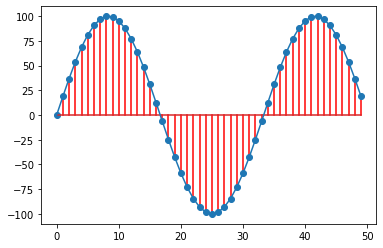

In [158]:
import numpy as np
from scipy import signal as sg
import matplotlib.pyplot as plt

%matplotlib inline

sampling_rate = 100
freq = 3
samples = 50
x = np.arange(samples)
y = 100*np.sin(2 * np.pi * freq * x / sampling_rate)
plt.stem(x,y, 'r', )
plt.plot(x,y)


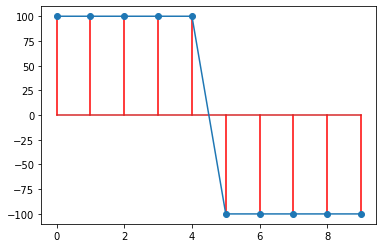

In [156]:
sampling_rate = 100
freq = 10
samples = 10
x = np.arange(samples)
y = 100*sg.square(2 * np.pi * freq * x / sampling_rate)
plt.stem(x,y, 'r', )
plt.plot(x,y)

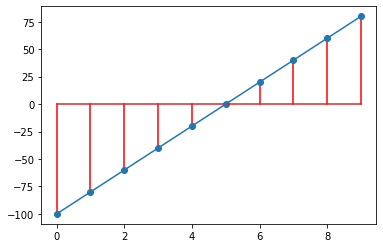

In [157]:
sampling_rate = 100
freq = 10
samples = 10
x = np.arange(samples)
y = 100*sg.sawtooth(2 * np.pi * freq * x / sampling_rate)
plt.stem(x,y, 'r', )
plt.plot(x,y)

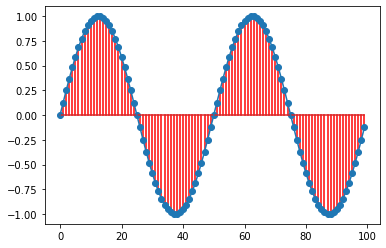

In [133]:
import matplotlib.pyplot as plt # For ploting
%matplotlib inline
import numpy as np # to work with numerical data efficiently

fs = 100 # sample rate 
f = 2 # the frequency of the signal

x = np.arange(fs) # the points on the x axis for plotting
# compute the value (amplitude) of the sin wave at the for each sample
y = np.sin(2*np.pi*f * (x/fs)) 

#this instruction can only be used with IPython Notbook. 

# showing the exact location of the smaples
plt.stem(x,y, 'r', )
plt.plot(x,y)